In [2]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.constants import Units
from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
KS_KE = []
for i in np.arange(0,30,1):
    with open('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD/0.5/si_0.5_'+str(i)+'_4_Btin_hd.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_ke = str(k).split()[6]
    KS_KE.append(float(KS_ke)) 
ks_ke = np.asarray(KS_KE)

In [5]:
pwd

'/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD'

In [6]:
rho = io.read_density('/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD/0.5/si_0.5_1_4_Btin_hd.xsf')
rho *= 16.0/rho.integral()
rho.integral()

16.00000000000001

In [17]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        rho *= 16.0/rho.integral()
        OF_KE = KE(rho).energy
        print('of_ke = ', OF_KE)
        diff = np.abs(KS_KE*1/2-OF_KE)
        print('difference + ', diff)
        return diff

In [22]:
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS
from scipy.optimize import least_squares
nonlinear_constraint = NonlinearConstraint(min_energy, -np.inf, 1, jac='cs', hess=BFGS())
d = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    i = int(n)
    rho = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD/0.5/si_0.5_'+str(i)+'_4_Btin_hd.xsf')
    ions = Ions.from_ase(read('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD/0.5/si_0.5_'+str(i)+'_4_Btin_hd.in'))
    cell = ions.get_cell()
    ions.set_cell(cell * d[i], scale_atoms=True) 
    KS_KE = ks_ke[i]
    minn = minimize(min_energy, 0.2, args = (KS_KE, rho), method='Powell', bounds=[[0,1]], options={'ftol' : 1e-09})
    # minn = minimize(min_energy, 0.0001, args = (KS_KE, rho), method='trust-constr', tol=1e-8, constraints=[nonlinear_constraint])
    # min = least_squares(min_energy, 0, bounds=(-np.inf, 0), ftol=1e-09, args=(KS_KE, rho))
    # print(min.fun)
    # print(min.x)
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

of_ke =  8.44392732694097
difference +  0.33770794872292065
of_ke =  8.583406264167952
difference +  0.47718688594990155
of_ke =  8.65744628132822
difference +  0.5512269031101695
of_ke =  8.484355638256671
difference +  0.37813626003862133
of_ke =  8.359822189091561
difference +  0.25360281087351133
of_ke =  8.217275465393001
difference +  0.1110560871749513
of_ke =  8.076445342255457
difference +  0.02977403596259265
of_ke =  8.001332901946187
difference +  0.10488647627186332
of_ke =  8.10598127061861
difference +  0.00023810759943998505
of_ke =  8.153525394857834
difference +  0.04730601663978362
of_ke =  8.112527618141474
difference +  0.006308239923423997
of_ke =  8.101368755489831
difference +  0.004850622728218568
of_ke =  8.106566197504042
difference +  0.00034681928599233913
of_ke =  8.10583736438597
difference +  0.00038201383208047446
of_ke =  8.106213284493826
difference +  6.093724223887875e-06
of_ke =  8.106361251395558
difference +  0.0001418731775082449
of_ke =  7.7394

/home/valeria/miniconda3/envs/ai_kedf/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:334: RuntimeWarning: divide by zero encountered in divide
  return LindhardFunction(q / tkf, x, y) * factor
/home/valeria/miniconda3/envs/ai_kedf/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:334: RuntimeWarning: invalid value encountered in divide
  return LindhardFunction(q / tkf, x, y) * factor
/home/valeria/miniconda3/envs/ai_kedf/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:54: RuntimeWarning: invalid value encountered in divide
  + 0.25 * (1.0 - eta ** 2) * np.log((1.0 + eta) / np.abs(1.0 - eta)) / eta
/home/valeria/miniconda3/envs/ai_kedf/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:75: RuntimeWarning: invalid value encountered in multiply
  3.0 * (1.0 - mu) * eta ** 2


of_ke =  7.791635970705989
difference +  0.35288894630093903
of_ke =  7.914709318078713
difference +  0.47596229367366316
of_ke =  7.9800914053241145
difference +  0.5413443809190648
of_ke =  7.827272697434602
difference +  0.38852567302955254
of_ke =  7.718033467485477
difference +  0.2792864430804274
of_ke =  7.595397169943936
difference +  0.15665014553888668
of_ke =  7.466238467392754
difference +  0.027491442987704673
of_ke =  7.362358181474493
difference +  0.07638884293055703
of_ke =  7.465958756424985
difference +  0.027211732019935653
of_ke =  7.429835992974311
difference +  0.008911031430738348
of_ke =  7.400247268684887
difference +  0.03849975572016273
of_ke =  7.4266369029748365
difference +  0.012110121430213283
of_ke =  7.442535393817092
difference +  0.003788369412042414
of_ke =  7.44133018233576
difference +  0.002583157930709845
of_ke =  7.437938417249048
difference +  0.0008086071560020613
of_ke =  7.43487108380494
difference +  0.003875940600109651
of_ke =  7.437035

/home/valeria/miniconda3/envs/ai_kedf/lib/python3.11/site-packages/dftpy/functional/kedf/kernel.py:329: RuntimeWarning: invalid value encountered in power
  tkf = 2.0 * (3.0 * rho0 * np.pi ** 2) ** (1.0 / 3.0)


of_ke =  5.79250544362516
difference +  0.0984733225784904
of_ke =  5.944190958426061
difference +  0.05321219222241069
of_ke =  5.903860097086171
difference +  0.012881330882520636
of_ke =  5.867256447903774
difference +  0.023722318299876477
of_ke =  5.897331467254685
difference +  0.006352701051034693
of_ke =  5.889781092579365
difference +  0.0011976736242855779
of_ke =  5.881396872090336
difference +  0.009581894113314782
of_ke =  5.890458281553988
difference +  0.0005204846496624782
of_ke =  5.892200918351477
difference +  0.0012221521478270603
of_ke =  5.891125514177347
difference +  0.0001467479736962929
of_ke =  5.891508898748638
difference +  0.0005301325449877936
of_ke =  6.2087033185640665
difference +  0.4627589845712663
of_ke =  6.310964174078537
difference +  0.5650198400857365
of_ke =  6.365598447670234
difference +  0.6196541136774334
of_ke =  6.238213200644065
difference +  0.4922688666512647
of_ke =  6.14783079666093
difference +  0.4018864626681298
of_ke =  6.049219

In [1]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')
# ax

NameError: name 'plt' is not defined

In [21]:
len(np.asarray(R0))

16

In [24]:
np.save('/home/valeria/Documents/DFTPY/cWT-KEDF/Phases/Model_ML_function/training_set_data/ks_calculations/Transition_Btin_HD/DATA2/rho0.npy', np.asarray(R0))

There exist multiple values of $\rho_{0}$ that can minimize the difference between KS and OF kinetic energy, for that in the two points we run again fe function min_energy and define new bounds where we know there will be a nother $\rho_{0}$ that minimizes the difference between both KE

In [39]:
l = np.linspace(0.8, 1.4, 30)
delta_E1 = []
R1 = []
vol1 = []
for n in np.arange(7,9,1):
    i = int(n)
    rho = io.read_density('.../Si-B-tin/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(crystal('Si',[(0,0,0)],spacegroup=141,cellpar = [4.81,4.81,2.65, 90,90,90]))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = ks_ke[i]
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.037,0.04]], options={'ftol' : 1e-6})
    VOLUME = ions.get_volume()
    vol1.append(VOLUME)
    delta_E1.append(minn.fun)
    R1.append(minn.x)

/tmp/ipykernel_14256/414295761.py:12: OptimizeWarning: Initial guess is not within the specified bounds
  minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.037,0.04]], options={'ftol' : 1e-6})


In [45]:
rho0 = np.asarray(R0)
rho0[7] = np.asarray(R1[0])
rho0[8] = np.asarray(R1[1])
d_E = np.asarray(delta_E)
d_E[7] = np.asarray(delta_E1[0])
d_E[8] = np.asarray(delta_E1[1])

Text(0, 0.5, '$ρ_{0}$')

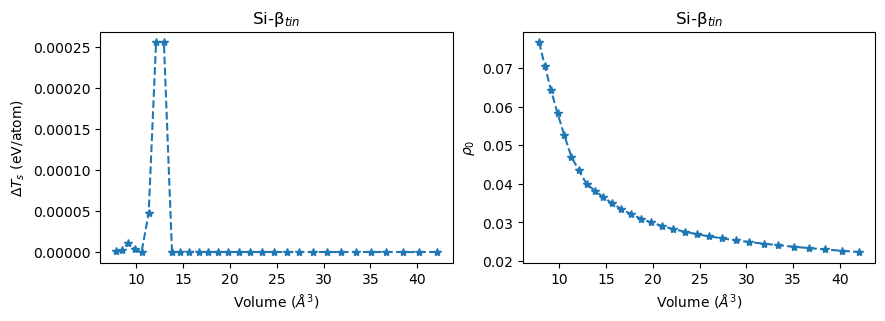

In [47]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rh0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [4]:
np.save(".../Si-B-tin/DATA2/rho0.npy", rho0)